In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [2]:
# general imports
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import time
import numpy as np

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice

In [3]:
# function to build a GHZ state
def ghz_circuit(n_qubits):
    """
    function to return a GHZ circuit ansatz
    input: number of qubits
    """

    # instantiate circuit object
    circuit = Circuit()
    
    # add Hadamard gate on first qubit
    circuit.h(0)

    # apply series of CNOT gates
    for ii in range(0, n_qubits-1):
        circuit.cnot(control=ii, target=ii+1)

    return circuit

In [4]:
# define circuit
n_qubits = 10
ghz = ghz_circuit(n_qubits)

In [5]:
# print circuit
print(ghz)

T  : |0|1|2|3|4|5|6|7|8|9|
                          
q0 : -H-C-----------------
        |                 
q1 : ---X-C---------------
          |               
q2 : -----X-C-------------
            |             
q3 : -------X-C-----------
              |           
q4 : ---------X-C---------
                |         
q5 : -----------X-C-------
                  |       
q6 : -------------X-C-----
                    |     
q7 : ---------------X-C---
                      |   
q8 : -----------------X-C-
                        | 
q9 : -------------------X-

T  : |0|1|2|3|4|5|6|7|8|9|


In [6]:
# set up device: Local Simulator
device = LocalSimulator()

In [7]:
# run circuit
result = device.run(ghz, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'0000000000': 509, '1111111111': 491})


Text(0, 0.5, 'counts')

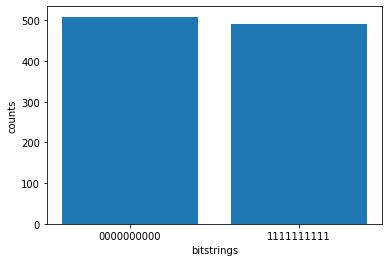

In [8]:
# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

In [9]:
# define circuit
n_qubits = 3
ghz = ghz_circuit(n_qubits)      

# add the state_vector ResultType
ghz.state_vector()
# add the Z \otimes Z \otimes Z expectation value
ghz.expectation(Observable.Z() @ Observable.Z() @ Observable.Z(), target=[0,1,2])
# add the amplitude for |111>
ghz.amplitude(state=["111"])
# print circuit including requested result types
print(ghz)

T  : |0|1|2|   Result Types   |
                               
q0 : -H-C---Expectation(Z@Z@Z)-
        |   |                  
q1 : ---X-C-Expectation(Z@Z@Z)-
          | |                  
q2 : -----X-Expectation(Z@Z@Z)-

T  : |0|1|2|   Result Types   |

Additional result types: StateVector, Amplitude(111)


In [10]:
# run the circuit and output the results
task = device.run(ghz, shots=0)
result = task.result()

# print results
print("Final EXACT state vector:\n", result.values[0])
print("Expectation value <ZZZ>:", np.round(result.values[1], 5))
print("Amplitude <111|Final state>:", result.values[2])

Final EXACT state vector:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Expectation value <ZZZ>: 0.0
Amplitude <111|Final state>: {'111': (0.7071067811865475+0j)}


In [12]:
# set up the on-demand simulator SV1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

Counter({'111111111111111': 504, '000000000000000': 496})
Counts for all-zero bitstring: 496
Counts for all-one bitstring: 504


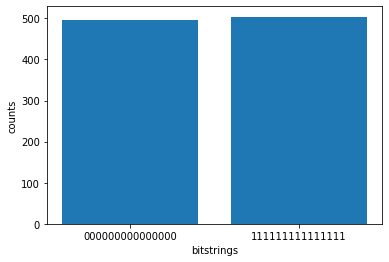

In [14]:
# define a 15-qubit GHZ circuit
n_qubits = 15
ghz = ghz_circuit(n_qubits)

# run GHZ circuit on SV1
result = device.run(ghz, shots=1000).result()
counts = result.measurement_counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

# print counts of all-zero-string
print('Counts for all-zero bitstring:', counts['0'*n_qubits])
# print counts of all-one-string
print('Counts for all-one bitstring:', counts['1'*n_qubits])

In [15]:
# set up the on-demand simulator TN1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/tn1")

In [16]:
# define a larger GHZ circuit
n_qubits = 50
ghz = ghz_circuit(n_qubits)

# run the same circuit on TN1
result = device.run(ghz, shots=1000).result()
counts = result.measurement_counts
print(counts)

# print counts of all-zero-string
print('Counts for all-zero bitstring:', counts['0'*n_qubits])
# print counts of all-one-string
print('Counts for all-one bitstring:', counts['1'*n_qubits])

Counter({'11111111111111111111111111111111111111111111111111': 522, '00000000000000000000000000000000000000000000000000': 478})
Counts for all-zero bitstring: 478
Counts for all-one bitstring: 522


In [18]:
# print unique TASK ID (task = execution of individual circuit)
task_id = result.task_metadata.id
# recover other metadata information such as number of qubits
n = result.task_metadata.deviceParameters.paradigmParameters.qubitCount
# print('Task ID:', task_id)
print('Number of qubits:', n)

Number of qubits: 50


In [19]:
print("Task Summary")
print(t.quantum_tasks_statistics())
print('Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.2f} USD")

Task Summary
{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 2000, 'tasks': {'COMPLETED': 2}, 'execution_duration': datetime.timedelta(microseconds=363000), 'billed_execution_duration': datetime.timedelta(seconds=6)}, 'arn:aws:braket:::device/quantum-simulator/amazon/tn1': {'shots': 1000, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(seconds=4, microseconds=135000), 'billed_execution_duration': datetime.timedelta(seconds=4, microseconds=135000)}}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.03 USD
